#Linear Regression with things like Multicollinearity, Hypothesis Testing, Feature Selection, and much mo
# import libraries


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Loading data

In [2]:
data = pd.read_csv("E:/learning/AI1/Machine Learning A-Z - work/Project/Machine-Learning-Projects-With-Python/Advertising-analysis/Advertising.csv")
data.drop("Unnamed: 0", axis =1,inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Sales vs Advertising

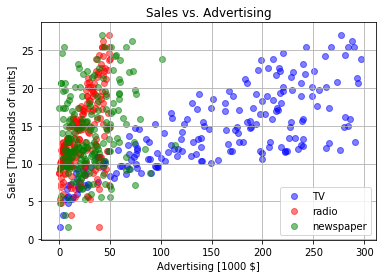

In [3]:
plt.scatter(data.TV, data.Sales, color='blue', label='TV', alpha=0.5)
plt.scatter(data.Radio, data.Sales, color='red', label='radio', alpha=0.5)
plt.scatter(data.Newspaper, data.Sales, color='green', label='newspaper', alpha=0.5)

plt.legend(loc="lower right")
plt.title("Sales vs. Advertising")
plt.xlabel("Advertising [1000 $]")
plt.ylabel("Sales [Thousands of units]")
plt.grid()
plt.show()

# Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(data.drop('Sales', axis=1), data.Sales)

print("Intercept: ", regression.intercept_)
print("Coefficients: ", regression.coef_)

Intercept:  2.9388893694594085
Coefficients:  [ 0.04576465  0.18853002 -0.00103749]


# correlations among the variables

In [5]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Plotting the heatmap to visualize the Correlation

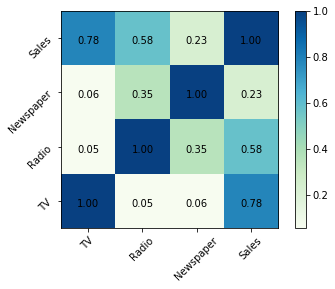

In [6]:

# Plotting correlation heatmap
plt.ylim(-.5,3.5)
plt.imshow(data.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns, rotation=45)

# Putting annotations
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        text = '%.2f'%(data.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

# Hypothesis test 

In [7]:
#print(regression.summary2())

# Defining the function to evaluate amodel

In [8]:
def evaluateModel (model):
    print("RSS = ", ((data.sales - model.predict())**2).sum())
    print("R2 = ", model.rsquared)
    
# For TV
model_TV = regression.fit(data.iloc[:,1:2].values, data.iloc[:,2:3].values)
print("model_TV")
evaluateModel(model_TV)
print("------------")

model_TV


AttributeError: 'DataFrame' object has no attribute 'sales'